In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from preprocessing import Preprocessing
from visualization import Visualization
from classifieurs import Classification

import warnings
warnings.filterwarnings('ignore')

# Preprocessing of data

## Data loading

In [3]:
path = 'data/star_classification.csv'
Pr = Preprocessing(path)
df = Pr.load_data_from_csv()

In [4]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


## Data analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [6]:
print(df['class'].unique())

['GALAXY' 'QSO' 'STAR']


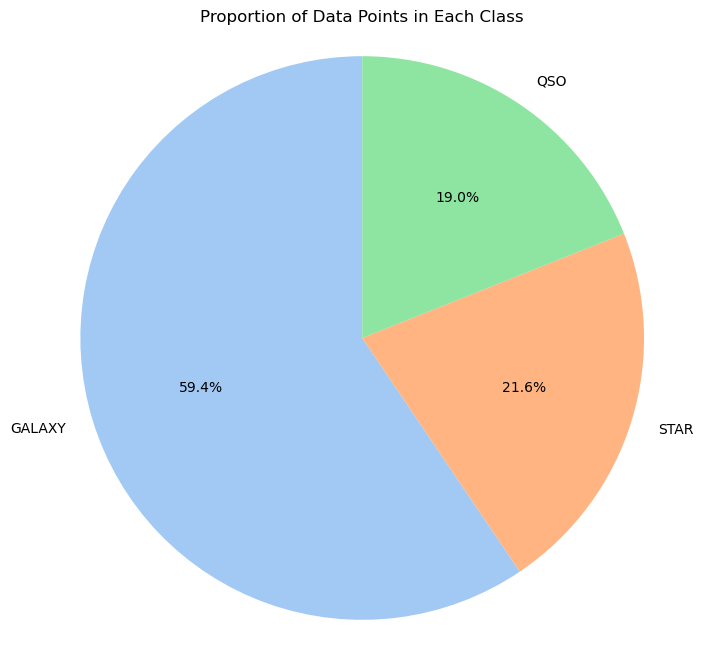

In [7]:
import seaborn as sns
class_counts = df['class'].value_counts()
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Proportion of Data Points in Each Class')
plt.axis('equal')  # Ensures the pie is a circle
plt.show()

In [8]:
encoded_labels , classes = Pr.label_encoding(df,'class')

In [9]:
# Obtenir le mapping des classes
class_mapping = {index: label for index, label in enumerate(classes)}

In [10]:
class_mapping

{0: 'GALAXY', 1: 'QSO', 2: 'STAR'}

In [11]:
df['class'] = encoded_labels

In [12]:
Vis= Visualization(df)

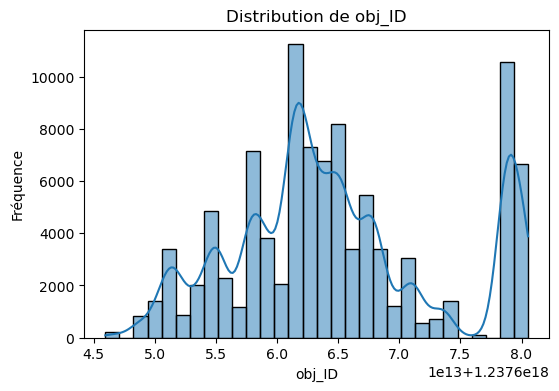

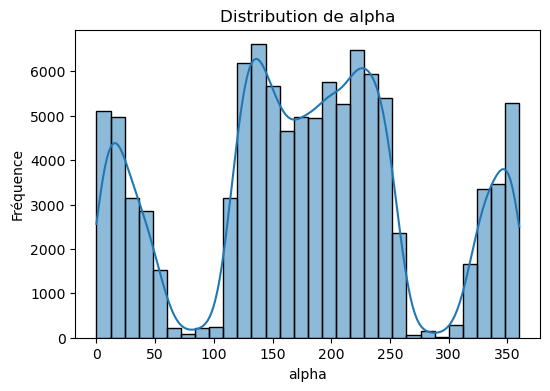

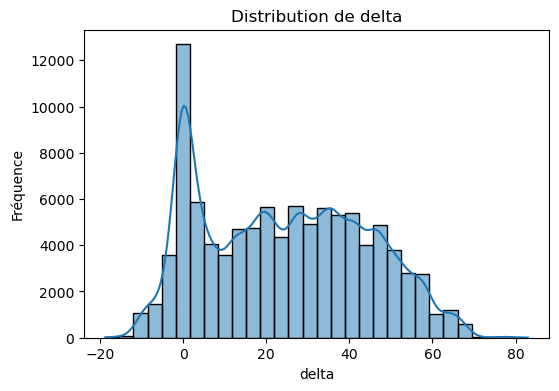

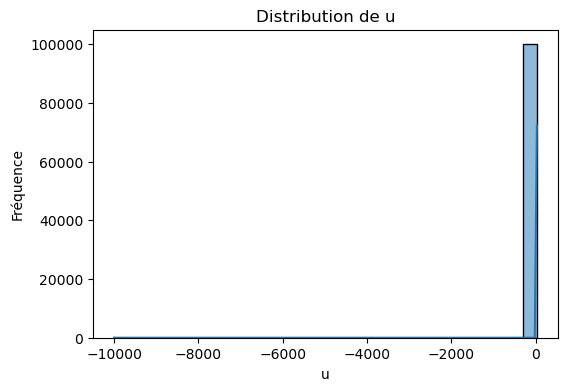

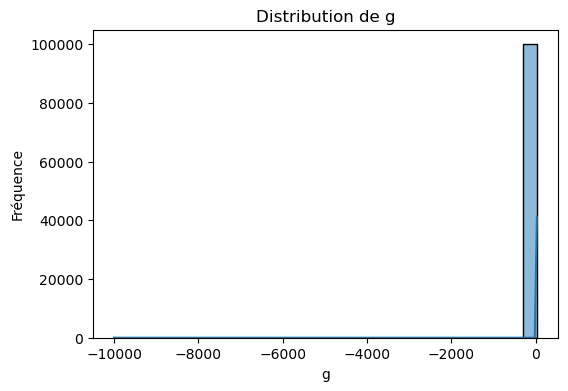

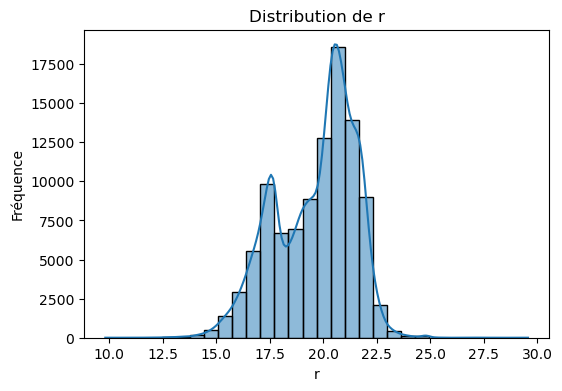

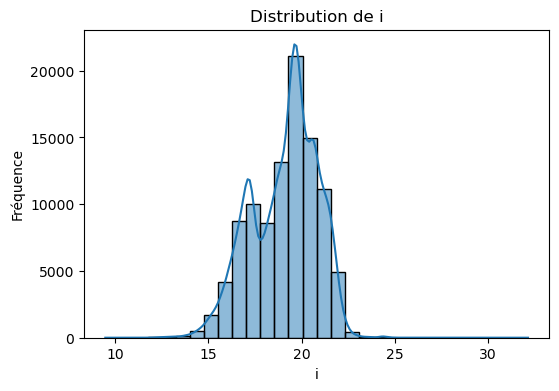

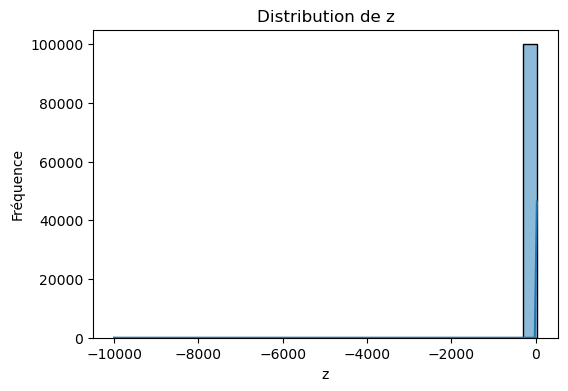

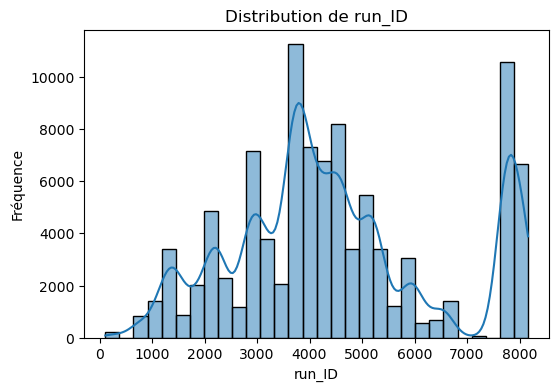

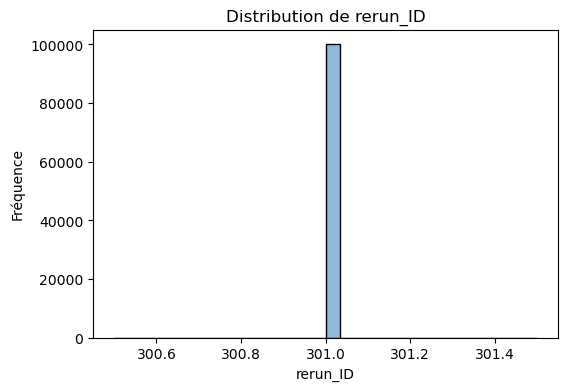

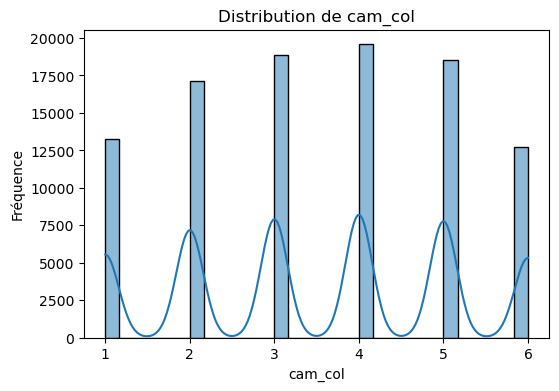

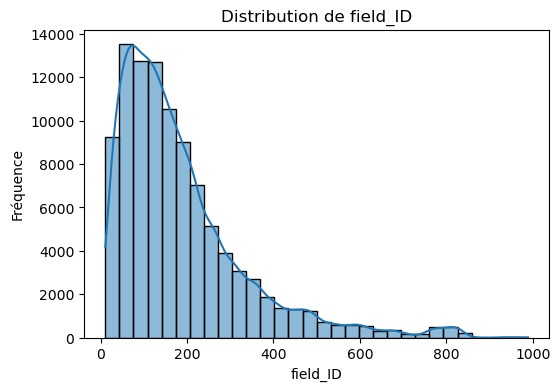

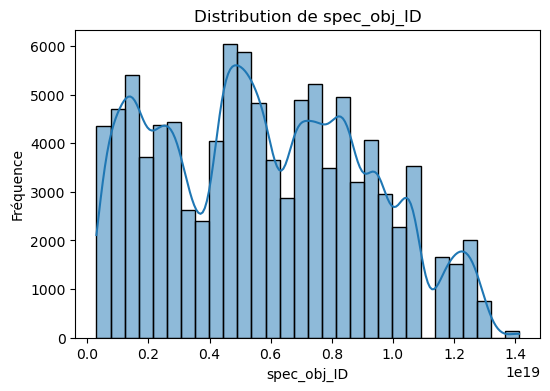

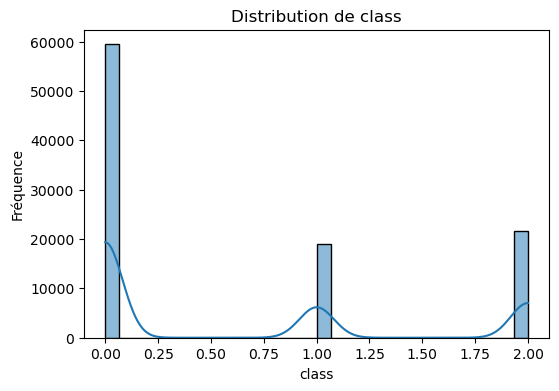

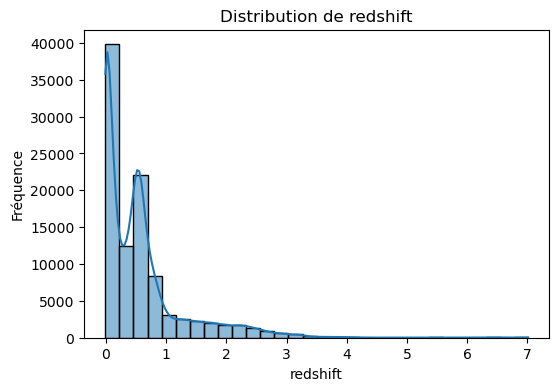

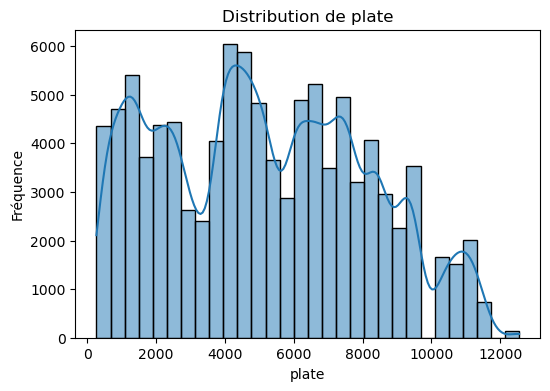

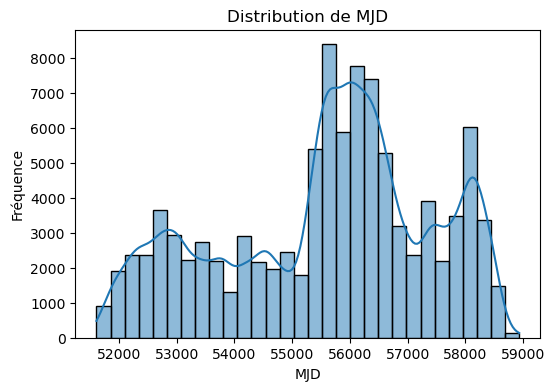

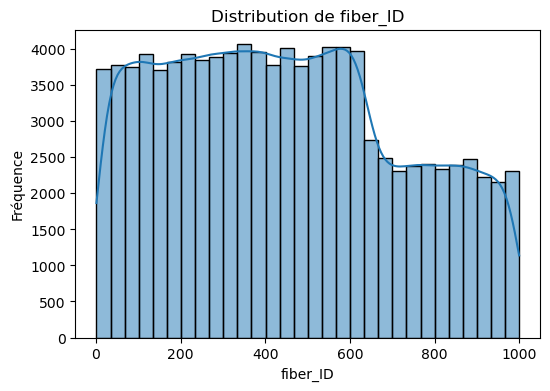

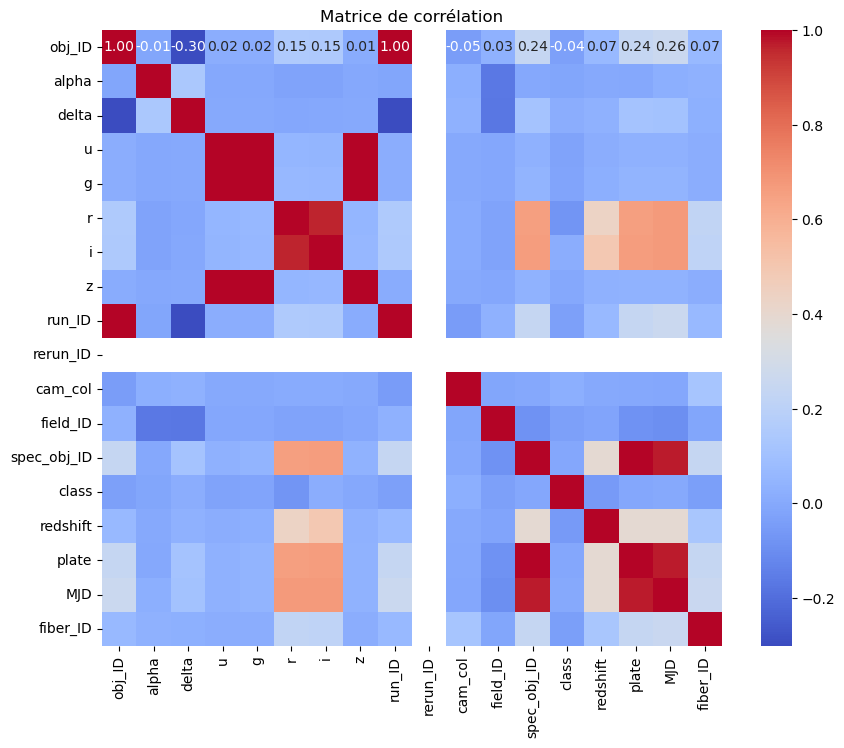

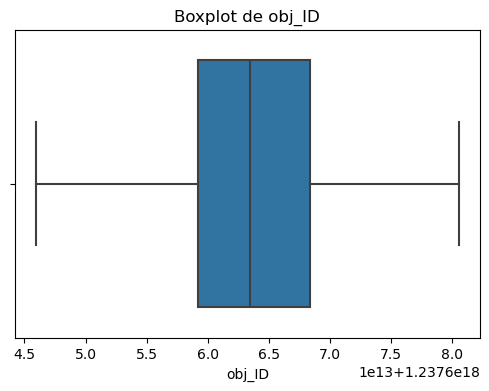

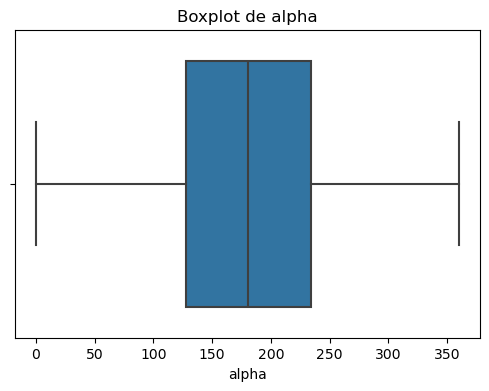

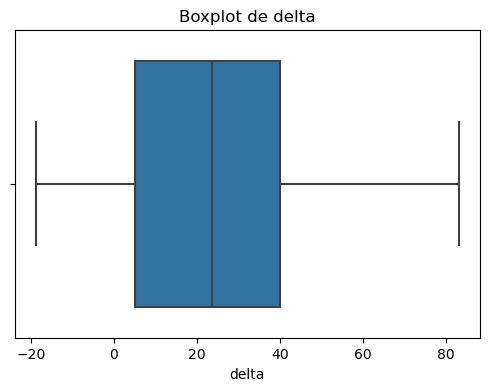

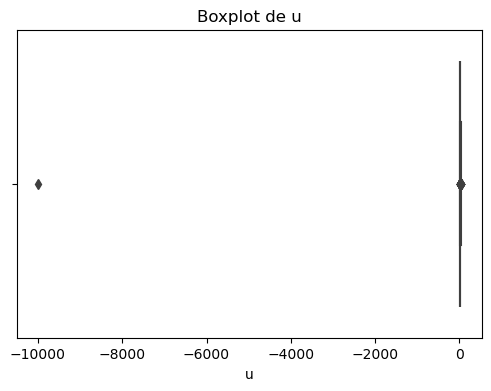

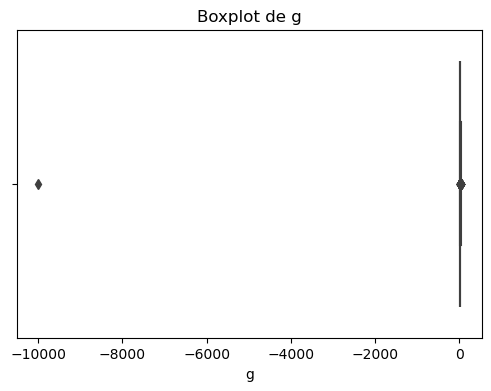

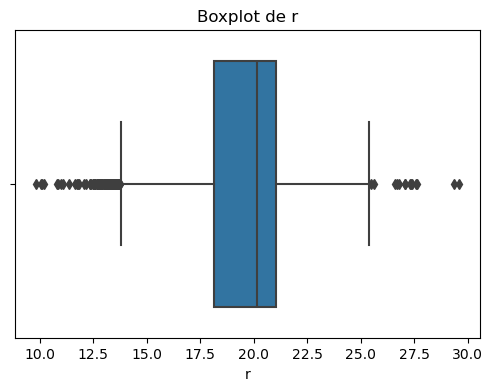

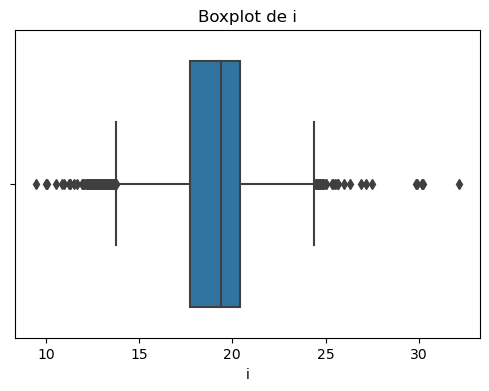

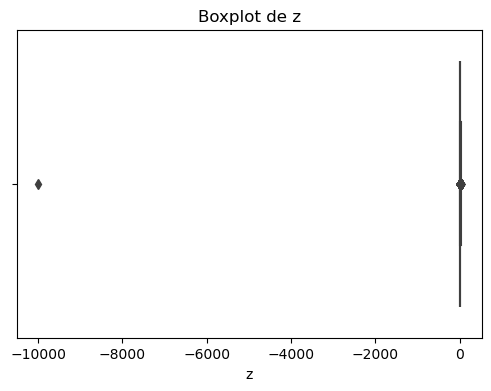

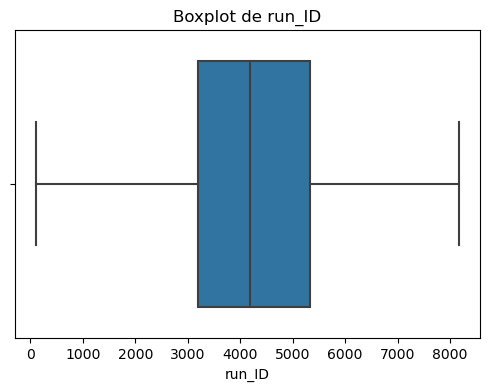

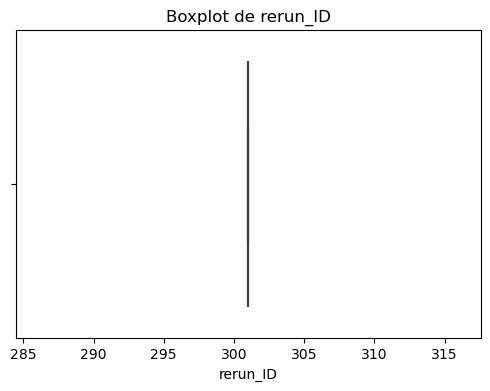

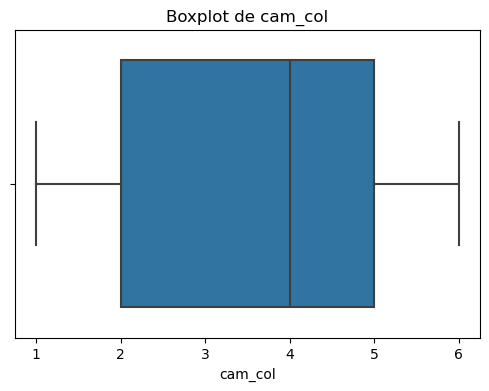

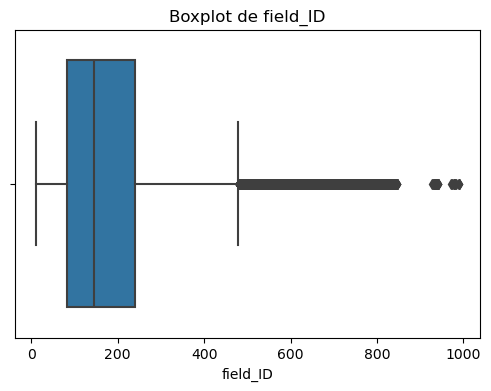

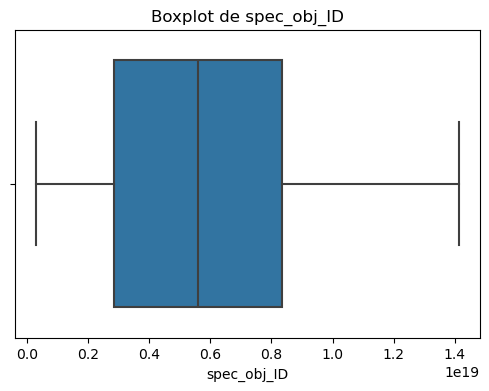

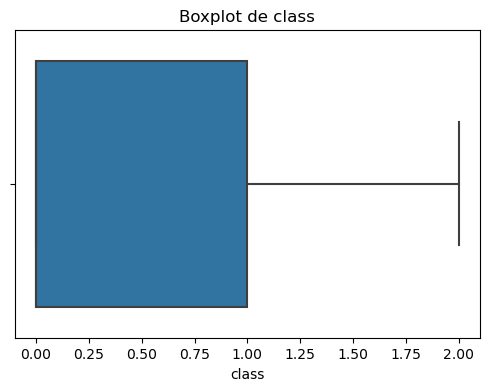

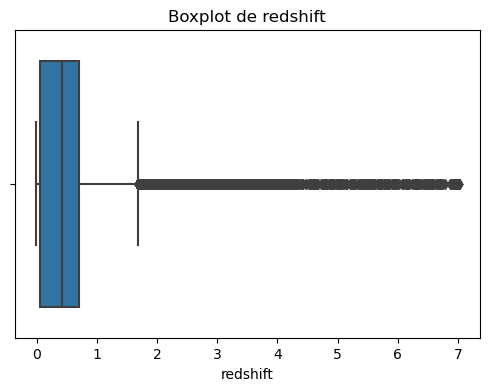

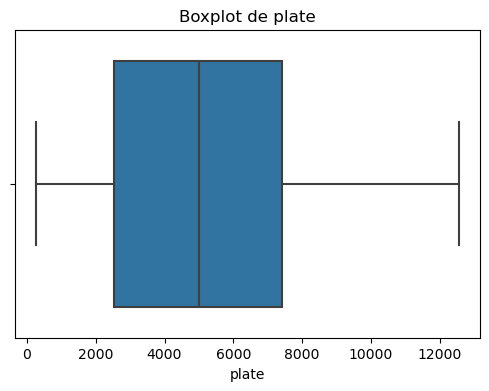

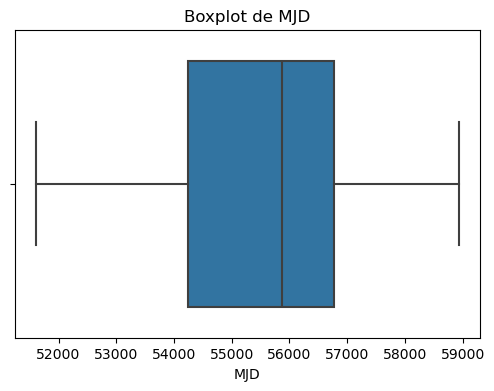

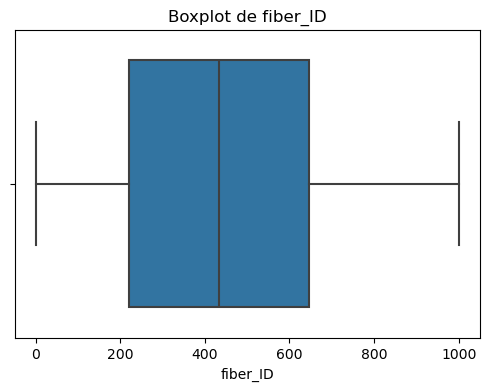

In [13]:
Vis.plot_data_analysis()

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
obj_ID,100000.0,1.237665e+18,8.438560e+12,1.237646e+18,1.237659e+18,1.237663e+18,1.237668e+18,1.237681e+18
alpha,100000.0,1.776291e+02,9.650224e+01,5.527828e-03,1.275182e+02,1.809007e+02,2.338950e+02,3.599998e+02
delta,100000.0,2.413530e+01,1.964467e+01,-1.878533e+01,5.146771e+00,2.364592e+01,3.990155e+01,8.300052e+01
u,100000.0,2.198047e+01,3.176929e+01,-9.999000e+03,2.035235e+01,2.217914e+01,2.368744e+01,3.278139e+01
g,100000.0,2.053139e+01,3.175029e+01,-9.999000e+03,1.896523e+01,2.109983e+01,2.212377e+01,3.160224e+01
r,100000.0,1.964576e+01,1.854760e+00,9.822070e+00,1.813583e+01,2.012529e+01,2.104478e+01,2.957186e+01
i,100000.0,1.908485e+01,1.757895e+00,9.469903e+00,1.773228e+01,1.940514e+01,2.039650e+01,3.214147e+01
z,100000.0,1.866881e+01,3.172815e+01,-9.999000e+03,1.746068e+01,1.900460e+01,1.992112e+01,2.938374e+01
run_ID,100000.0,4.481366e+03,1.964765e+03,1.090000e+02,3.187000e+03,4.188000e+03,5.326000e+03,8.162000e+03
rerun_ID,100000.0,3.010000e+02,0.000000e+00,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02


'rerun-ID' column seems to have the same value for all samples, which makes it irrelevant for the classification. Same goes for 'obj_ID' as it only references teh samples. 

In [15]:
columns_to_drop = ['obj_ID','rerun_ID']

In [16]:
df = df.drop(columns_to_drop, axis = 1)

## Entrainement

In [17]:
X_train, X_test, y_train, y_test = Pr.Split_data(df, 'class')

In [ ]:
# Instanciation et entraînement
classifier = Classification(X_train, X_test, y_train, y_test)
results = classifier.train_and_evaluate()

RandomForestClassifier()
ok 1
ok 2
DecisionTreeClassifier()
ok 1
ok 2
KNeighborsClassifier()
ok 1
ok 2
LogisticRegression()
ok 1
ok 2
Pipeline(steps=[('poly', PolynomialFeatures()),
                ('logistic', LogisticRegression())])
ok 1
ok 2
MLPClassifier()
ok 1
ok 2
AdaBoostClassifier()
ok 1
ok 2
SVC()
ok 1


exception calling callback for <Future at 0x18f5053de10 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\Lib\site-packages\joblib\externals\loky\_base.py", line 26, in _invoke_callbacks
    callback(self)
  File "C:\Users\hp\anaconda3\Lib\site-packages\joblib\parallel.py", line 385, in __call__
    self.parallel.dispatch_next()
  File "C:\Users\hp\anaconda3\Lib\site-packages\joblib\parallel.py", line 834, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hp\anaconda3\Lib\site-packages\joblib\parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\hp\anaconda3\Lib\site-packages\joblib\parallel.py", line 819, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hp\anaconda3\Lib\site-packages\joblib\_paral